In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn 

In [3]:
data_confirmed = pd.read_csv('covid_19_confirmed_v1.csv')
data_deaths = pd.read_csv('covid_19_deaths_v1.csv')
data_recovered = pd.read_csv('covid_19_recovered_v1.csv')
data_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [4]:
data_confirmed.shape

(276, 498)

In [5]:
data_deaths.shape

(277, 498)

In [6]:
data_recovered.shape

(262, 498)

In [7]:
data_confirmed.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [8]:
data_deaths.dtypes

Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object

In [9]:
data_recovered.dtypes

Column1      object
Column2      object
Column3      object
Column4      object
Column5      object
              ...  
Column494    object
Column495    object
Column496    object
Column497    object
Column498    object
Length: 498, dtype: object

In [58]:
copy_data_confirmed = pd.DataFrame.copy(data_confirmed)
copy_data_confirmed.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
grouped = copy_data_confirmed.groupby('Country/Region').sum()
final = grouped.reset_index().melt(id_vars='Country/Region', var_name='date')
final['date'] = pd.to_datetime(final['date'])
final.head()


/tmp/ipykernel_3907/4090148235.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final['date'] = pd.to_datetime(final['date'])


,Country/Region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [52]:
top_countries = final.groupby('Country/Region')['value'].sum().sort_values(ascending=False)
top_countries.head(5)

Country/Region
US        6047736004
India     3226953590
Brazil    2653620509
Russia     930548859
France     855026731
Name: value, dtype: int64

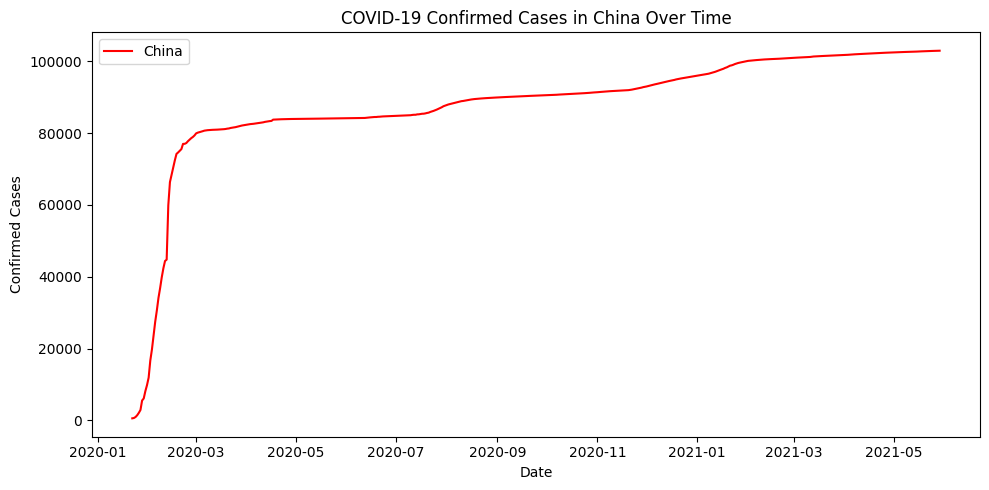

In [45]:
china_data = final[final["Country/Region"] == "China"]

plt.figure(figsize=(10, 5))
plt.plot(china_data["date"], china_data["value"], color='red', label='China')

plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases in China Over Time")
plt.legend()
plt.tight_layout()
plt.show()

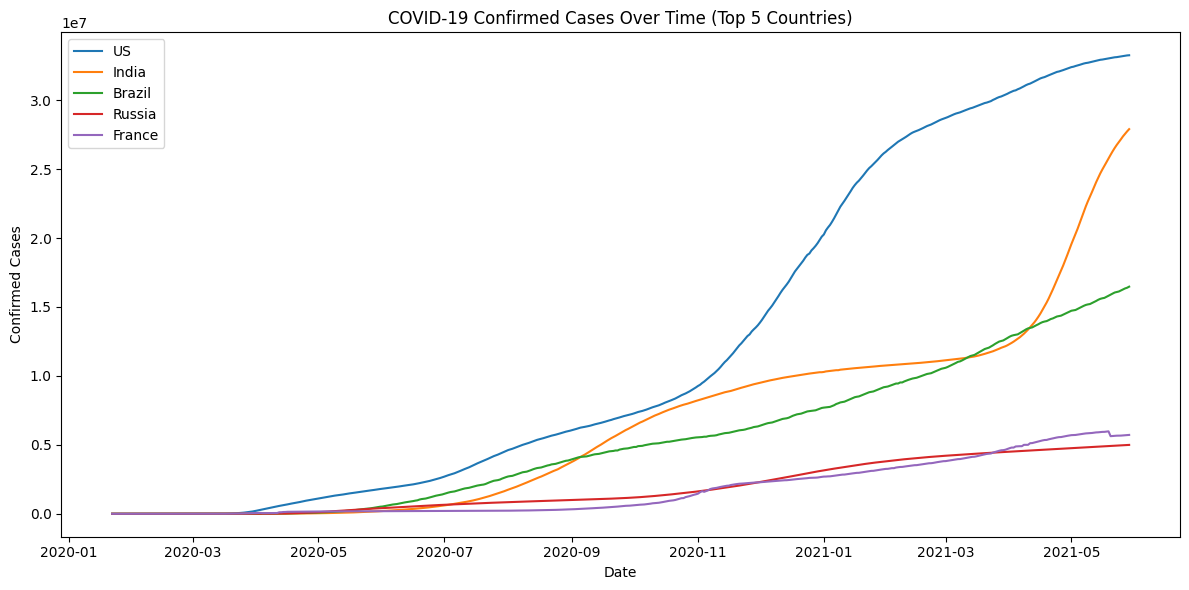

In [59]:
countries = ["US", "India", "Brazil", "Russia", "France"]
selected_data = final[final["Country/Region"].isin(countries)]
plt.figure(figsize=(12, 6))

# Loop through each country and plot
for country in countries:
    country_data = selected_data[selected_data["Country/Region"] == country]
    plt.plot(country_data["date"], country_data["value"], label=country)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases Over Time (Top 5 Countries)")
plt.legend()
plt.tight_layout()
plt.show()